In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# trade data ( don't know how to analyze trade data yet)
day = 0
trade = pd.read_csv(f'round-2-island-data-bottle/trades_round_2_day_{day}.csv',sep=';')
products = trade.symbol.unique()
print(products)
trade.head(10)

['CROISSANTS' 'DJEMBES' 'RAINFOREST_RESIN' 'KELP' 'SQUID_INK' 'JAMS'
 'PICNIC_BASKET1' 'PICNIC_BASKET2']


,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,NaN,NaN,CROISSANTS,SEASHELLS,4322.0,8
1,0,NaN,NaN,DJEMBES,SEASHELLS,13494.0,3
2,100,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,10002.0,1
3,300,NaN,NaN,KELP,SEASHELLS,2029.0,6
4,300,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9998.0,2
5,300,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9998.0,1
6,300,NaN,NaN,SQUID_INK,SEASHELLS,1965.0,6
7,500,NaN,NaN,JAMS,SEASHELLS,6631.0,10
8,500,NaN,NaN,KELP,SEASHELLS,2031.0,1
9,500,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,10004.0,1


In [3]:
price = pd.DataFrame()
for day in [-1,0,1]:
    price_day = pd.read_csv(f'round-2-island-data-bottle/prices_round_2_day_{day}.csv',sep=';')
    price = pd.concat([price,price_day])
price.head()
price.fillna(0,inplace=True)
price['timestamp'] = price['timestamp']/100 + price['day'] * 10000 + 10000
price.set_index('timestamp',inplace=True)
# 计算盘口中间价
price['mid_depth_price'] = (price['bid_price_1'] * price['bid_volume_1'] + price['bid_price_2']*price['bid_volume_2'] + price['bid_price_3']*price['bid_volume_3'] 
                            + price['ask_price_1']*price['ask_volume_1'] + price['ask_price_2']*price['ask_volume_2'] + price['ask_price_3']*price['ask_volume_3']
                            )/(
                                price['bid_volume_1']+price['bid_volume_2']+price['bid_volume_3']+price['ask_volume_1']+price['ask_volume_2']+price['ask_volume_3'])
price['return'] = price.groupby('product')['mid_depth_price'].pct_change()
price.head(20)

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,mid_depth_price,return
timestamp,,,,,,,,,,,,,,,,,,
0.0,-1,CROISSANTS,4304,112,0.0,0.0,0.0,0.0,4305,112,0.0,0.0,0.0,0.0,4304.5,0.0,4304.500000,NaN
0.0,-1,JAMS,6670,66,6669.0,137.0,0.0,0.0,6671,66,6672.0,137.0,0.0,0.0,6670.5,0.0,6670.500000,NaN
0.0,-1,SQUID_INK,2005,1,2002.0,31.0,0.0,0.0,2006,31,0.0,0.0,0.0,0.0,2005.5,0.0,2004.015873,NaN
0.0,-1,PICNIC_BASKET1,59284,20,59283.0,18.0,0.0,0.0,59294,2,59295.0,36.0,0.0,0.0,59289.0,0.0,59289.236842,NaN
0.0,-1,PICNIC_BASKET2,30606,20,30605.0,18.0,0.0,0.0,30612,20,30613.0,18.0,0.0,0.0,30609.0,0.0,30609.000000,NaN
0.0,-1,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,0.0,0.0,10003.0,0.0,10000.031746,NaN
0.0,-1,DJEMBES,13450,55,0.0,0.0,0.0,0.0,13451,55,0.0,0.0,0.0,0.0,13450.5,0.0,13450.500000,NaN
0.0,-1,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,0.0,0.0,0.0,0.0,2028.5,0.0,2027.047619,NaN
1.0,-1,PICNIC_BASKET1,59282,17,59281.0,20.0,0.0,0.0,59292,2,59293.0,15.0,59294.0,20.0,59287.0,0.0,59287.472973,-0.000030


In [4]:
# 计算最大可能收益
for product in products:
    product_price = price[price['product'] == product]
    product_max_return = (product_price[product_price['return'] >= 0]['return'] + 1).cumprod().iloc[-1]
    print(f"{product} max return: {product_max_return}")

CROISSANTS max return: 2.0609957456656787
DJEMBES max return: 1.8170937322931364
RAINFOREST_RESIN max return: 1.5598652161450233
KELP max return: 2.8651171000294675
SQUID_INK max return: 1531.728525479666
JAMS max return: 1.911167189272327
PICNIC_BASKET1 max return: 2.229477110548764
PICNIC_BASKET2 max return: 2.5096311794055097


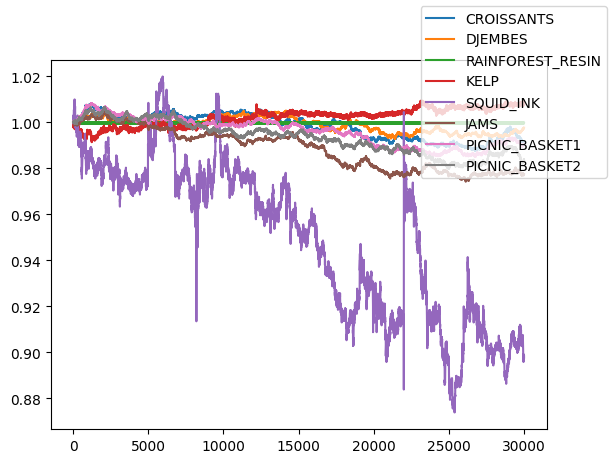

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
for product in products:
    product_price = price[price['product'] == product]
    plt.plot(
        product_price.index,
        product_price['mid_price'] / product_price['mid_price'].iloc[0],
        label=product
        )
fig.legend()
fig.show()

In [6]:
returns_df = price.pivot(columns='product', values='return')
returns_df.corr()

product,CROISSANTS,DJEMBES,JAMS,KELP,PICNIC_BASKET1,PICNIC_BASKET2,RAINFOREST_RESIN,SQUID_INK
product,,,,,,,,
CROISSANTS,1.000000,0.007217,0.008575,0.001208,0.412652,0.464182,-0.004069,-0.008484
DJEMBES,0.007217,1.000000,-0.005602,0.000208,0.202661,-0.008721,0.000540,0.006525
JAMS,0.008575,-0.005602,1.000000,-0.003906,0.297715,0.341752,0.009132,-0.006447
KELP,0.001208,0.000208,-0.003906,1.000000,-0.001370,0.003641,-0.003302,0.003604
PICNIC_BASKET1,0.412652,0.202661,0.297715,-0.001370,1.000000,0.343211,-0.002943,-0.009884
PICNIC_BASKET2,0.464182,-0.008721,0.341752,0.003641,0.343211,1.000000,0.003662,-0.002737
RAINFOREST_RESIN,-0.004069,0.000540,0.009132,-0.003302,-0.002943,0.003662,1.000000,-0.001508
SQUID_INK,-0.008484,0.006525,-0.006447,0.003604,-0.009884,-0.002737,-0.001508,1.000000


In [7]:
price_df = price.pivot(columns='product', values='mid_depth_price')
price_df.corr()

product,CROISSANTS,DJEMBES,JAMS,KELP,PICNIC_BASKET1,PICNIC_BASKET2,RAINFOREST_RESIN,SQUID_INK
product,,,,,,,,
CROISSANTS,1.000000,0.840319,0.885355,-0.753912,0.950033,0.907520,0.004168,0.828932
DJEMBES,0.840319,1.000000,0.820142,-0.611133,0.819292,0.738512,0.007101,0.747882
JAMS,0.885355,0.820142,1.000000,-0.852907,0.946340,0.953215,0.007079,0.879598
KELP,-0.753912,-0.611133,-0.852907,1.000000,-0.834762,-0.882046,-0.003697,-0.761675
PICNIC_BASKET1,0.950033,0.819292,0.946340,-0.834762,1.000000,0.955922,0.005395,0.818713
PICNIC_BASKET2,0.907520,0.738512,0.953215,-0.882046,0.955922,1.000000,0.003684,0.868703
RAINFOREST_RESIN,0.004168,0.007101,0.007079,-0.003697,0.005395,0.003684,1.000000,0.003230
SQUID_INK,0.828932,0.747882,0.879598,-0.761675,0.818713,0.868703,0.003230,1.000000


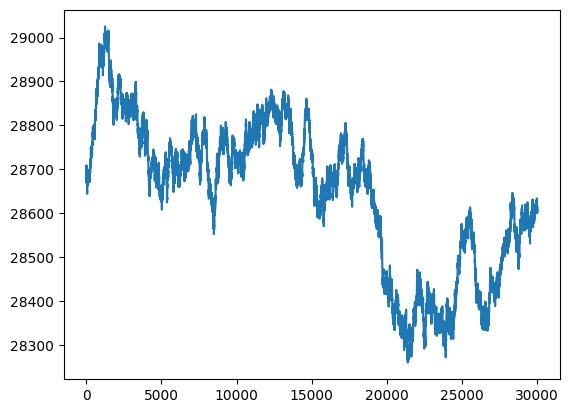

In [8]:
spread = price_df['PICNIC_BASKET1'] - price_df['PICNIC_BASKET2']
plt.plot(spread)
plt.show()

<Figure size 1200x800 with 0 Axes>

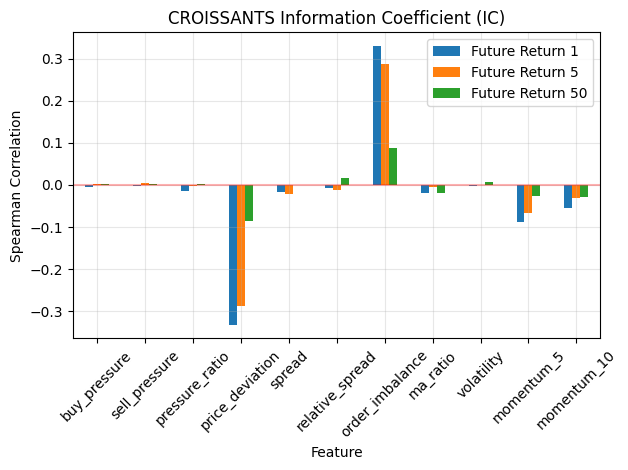

<Figure size 1200x800 with 0 Axes>

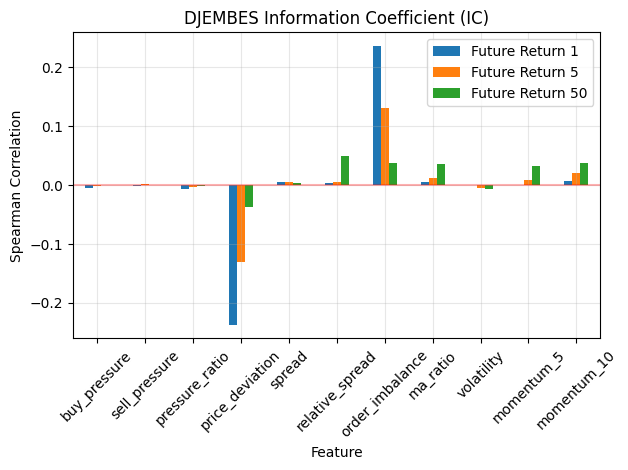

<Figure size 1200x800 with 0 Axes>

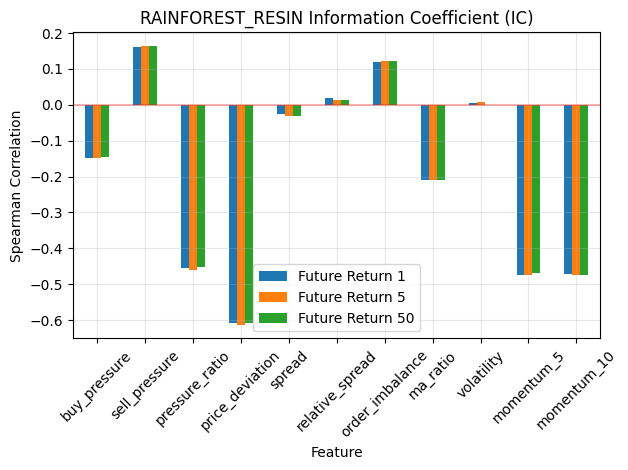

<Figure size 1200x800 with 0 Axes>

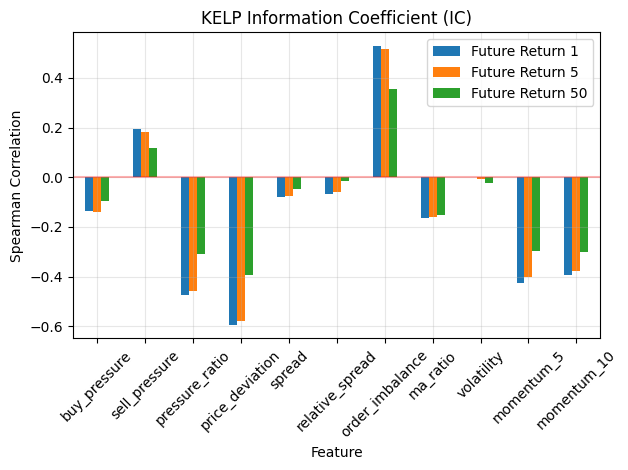

<Figure size 1200x800 with 0 Axes>

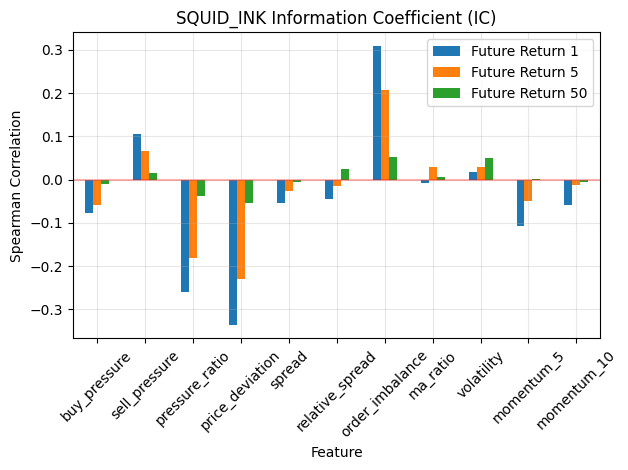

<Figure size 1200x800 with 0 Axes>

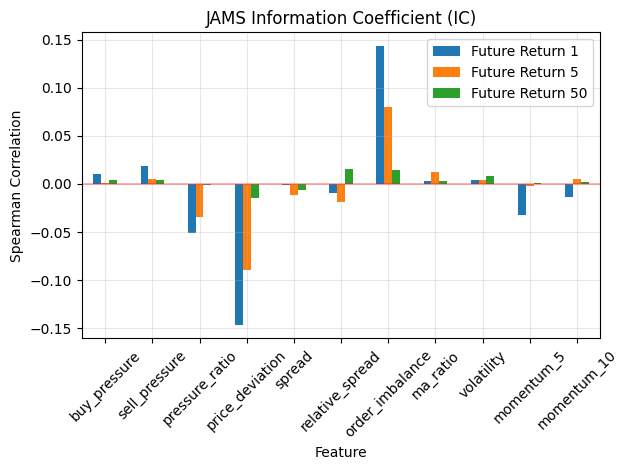

<Figure size 1200x800 with 0 Axes>

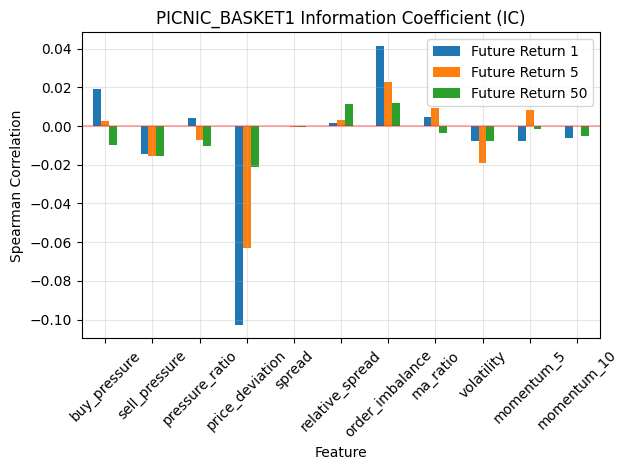

<Figure size 1200x800 with 0 Axes>

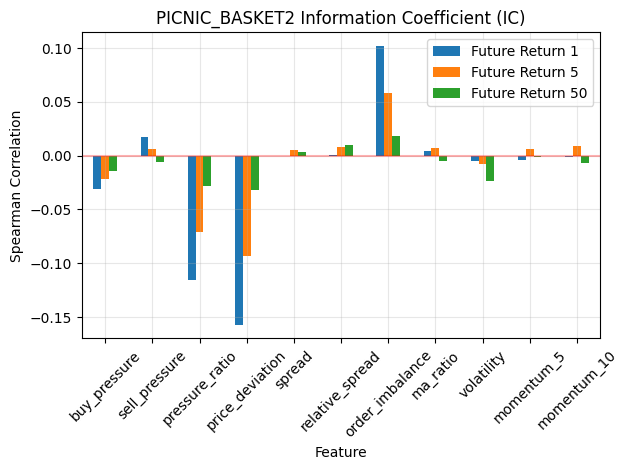

In [15]:
# 导入需要的库
import numpy as np
from scipy.stats import spearmanr

# 按产品分组并为每个产品计算特征
def create_features(df,product):
    features = pd.DataFrame()
    
    # 只处理SQUID_INK
    product_data = df[df['product'] == product].copy()
    
    # 计算买卖压力因子
    product_data['buy_pressure'] = product_data['bid_volume_1'] + product_data['bid_volume_2'] + product_data['bid_volume_3']
    product_data['sell_pressure'] = product_data['ask_volume_1'] + product_data['ask_volume_2'] + product_data['ask_volume_3']
    product_data['pressure_ratio'] = product_data['buy_pressure'] / (product_data['sell_pressure'] + 1e-10)
    
    # 计算价格偏离度因子
    product_data['price_deviation'] = (product_data['mid_price'] - product_data['mid_depth_price']) / product_data['mid_depth_price']
    
    # 计算价差因子
    product_data['spread'] = product_data['ask_price_1'] - product_data['bid_price_1']
    product_data['relative_spread'] = product_data['spread'] / product_data['mid_price']
    
    # 计算不平衡因子
    product_data['order_imbalance'] = (product_data['bid_volume_1'] - product_data['ask_volume_1']) / (product_data['bid_volume_1'] + product_data['ask_volume_1'] + 1e-10)
    
    # 计算移动平均和相对强度
    product_data['ma_5'] = product_data['mid_price'].rolling(5).mean()
    product_data['ma_10'] = product_data['mid_price'].rolling(10).mean()
    product_data['ma_ratio'] = product_data['ma_5'] / (product_data['ma_10'] + 1e-10)
    
    # 计算波动率
    product_data['volatility'] = product_data['return'].rolling(10).std()
    
    # 计算价格动量
    product_data['momentum_5'] = product_data['mid_price'].pct_change(5)
    product_data['momentum_10'] = product_data['mid_price'].pct_change(10)
    
    # 添加产品标识符
    product_data['product'] = 'SQUID_INK'
    
    # 填充缺失值
    features = product_data.fillna(0)
    return features

# 应用特征创建函数
features_dict = {}
for product in products:
    features_df = create_features(price,product)
    features_dict[product] = features_df
    # 计算未来收益率作为目标变量
    features_df['future_return_1'] = features_df.groupby('product')['mid_price'].shift(-1) / features_df['mid_price'] - 1
    features_df['future_return_5'] = features_df.groupby('product')['mid_price'].shift(-3) / features_df['mid_price'] - 1
    features_df['future_return_50'] = features_df.groupby('product')['mid_price'].shift(-50) / features_df['mid_price'] - 1

    # 删除缺失的目标变量
    features_df = features_df.dropna(subset=['future_return_1', 'future_return_5', 'future_return_50'])

    # 定义特征列和目标列
    feature_cols = ['buy_pressure', 'sell_pressure', 'pressure_ratio', 
                    'price_deviation', 'spread', 'relative_spread',
                    'order_imbalance', 'ma_ratio', 'volatility',
                    'momentum_5', 'momentum_10']

    target_cols = ['future_return_1', 'future_return_5', 'future_return_50']

    # 计算IC值
    ic_df = pd.DataFrame({
        'Feature': [],
        'Future Return 1': [],
        'Future Return 5': [],
        'Future Return 50': []
    })

    for feature in feature_cols:
        feature_ic = {}
        for target in target_cols:
            ic, _ = spearmanr(features_df[feature], features_df[target], nan_policy='omit')
            feature_ic[target] = ic
            
        ic_df = pd.concat([ic_df, pd.DataFrame({
            'Feature': [feature],
            'Future Return 1': [feature_ic['future_return_1']],
            'Future Return 5': [feature_ic['future_return_5']],
            'Future Return 50': [feature_ic['future_return_50']]
        })], ignore_index=True)

    ic_df = ic_df.set_index('Feature')

    # 可视化IC结果
    plt.figure(figsize=(12, 8))
    ic_df.plot(kind='bar')
    plt.title(f'{product} Information Coefficient (IC)')
    plt.ylabel('Spearman Correlation')
    plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [19]:
for product in products:
    scale = features_dict[product]['price_deviation'].describe()['mean'] + features_dict[product]['price_deviation'].describe()['std']
    print(product,scale)

CROISSANTS 4.6208190203664934e-05
DJEMBES 1.5128829799391387e-05
RAINFOREST_RESIN 0.00014417696580964708
KELP 0.0002606757543183168
SQUID_INK 0.000262455451443237
JAMS 1.59030107874042e-05
PICNIC_BASKET1 1.2875045901063886e-05
PICNIC_BASKET2 1.8426546876329906e-05
